In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Loading the salary data using

In [23]:
salary_data = pd.read_csv('Latest_Data_Science_Salaries.csv')

# Printing the first few rows of the dataset to get an overview of the data

In [24]:
salary_data.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


# Checking the summary statistics of the salary data

In [25]:
salary_data.describe()

,Salary,Salary in USD,Year
count,3.300000e+03,3300.000000,3300.000000
mean,2.046623e+05,142095.983939,2022.495455
std,7.279383e+05,69028.235512,0.716355
min,1.400000e+04,15000.000000,2020.000000
25%,9.416900e+04,90000.000000,2022.000000
50%,1.400000e+05,136000.000000,2023.000000
75%,1.900000e+05,185000.000000,2023.000000
max,3.040000e+07,450000.000000,2023.000000


In [26]:
salary_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


In [27]:
salary_data.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

# Visualizing the distribution of salaries using a histogram with kernel density estimation (KDE)

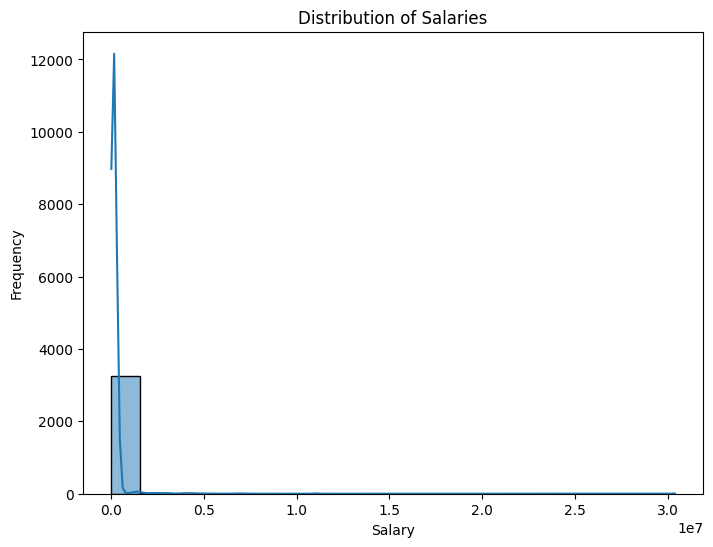

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data=salary_data,x='Salary', bins=20, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Visualizing the trend of salaries over the years using a line plot

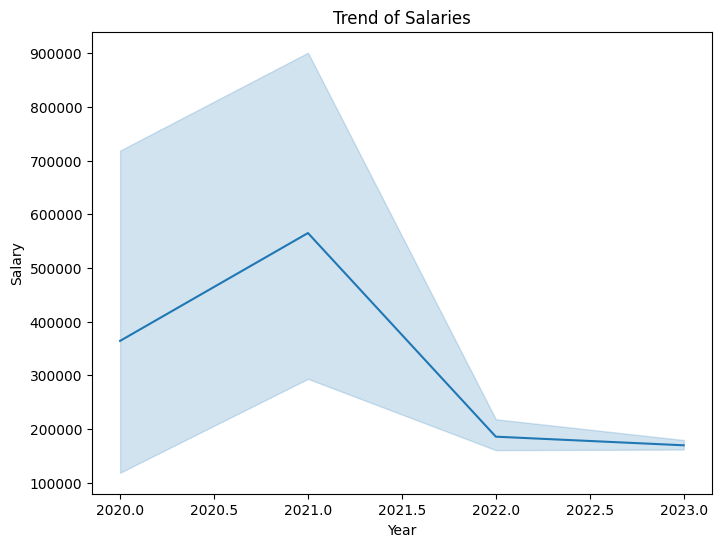

In [29]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=salary_data, x='Year', y='Salary')
plt.title('Trend of Salaries')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

# Calculating the average salary for each year

In [30]:
average_salary = salary_data.groupby('Year')['Salary'].mean()
print(average_salary)

Year
2020    364216.561644
2021    565170.958140
2022    185688.153543
2023    169652.722946
Name: Salary, dtype: float64


# Visualizing the average salary trend over the years using a line plot

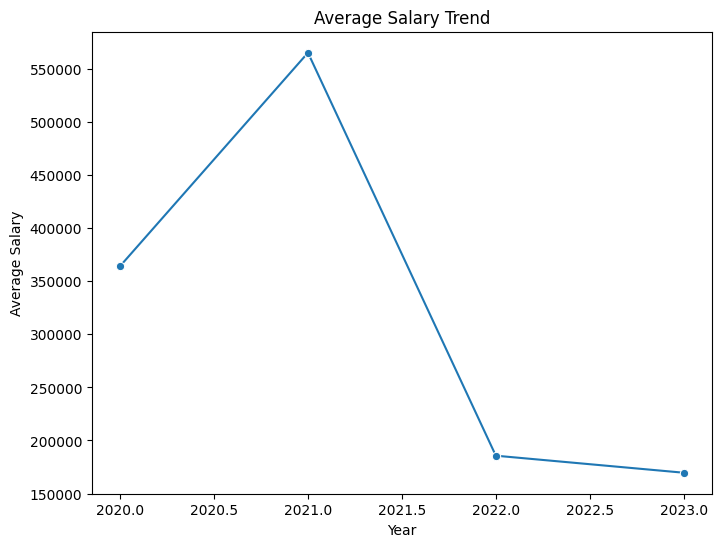

In [31]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=average_salary, marker='o')
plt.title('Average Salary Trend')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.show()

# Split the data into training and testing sets

In [32]:
X = salary_data['Year'].values.reshape(-1, 1)  # Year as input feature
y = salary_data['Salary'].values

# Split the data into training and testing sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predict salaries for future years (2020-2030)

In [35]:
future_years = np.arange(2020, 2031).reshape(-1, 1)
predicted_salaries = model.predict(future_years)

# Calculating Acccuracy for this Predicted Value

In [36]:
r2 = r2_score(y_test, model.predict(X_test))
print(f"R^2 Score: {r2:.2f}")

R^2 Score: 0.01


# Print the predicted salaries

In [37]:
for year, salary in zip(future_years.flatten(), predicted_salaries):
    print(f"Year: {year}, Predicted Salary: {salary:.2f}")

Year: 2020, Predicted Salary: 461081.84
Year: 2021, Predicted Salary: 357255.17
Year: 2022, Predicted Salary: 253428.51
Year: 2023, Predicted Salary: 149601.85
Year: 2024, Predicted Salary: 45775.19
Year: 2025, Predicted Salary: -58051.47
Year: 2026, Predicted Salary: -161878.14
Year: 2027, Predicted Salary: -265704.80
Year: 2028, Predicted Salary: -369531.46
Year: 2029, Predicted Salary: -473358.12
Year: 2030, Predicted Salary: -577184.78


# Graphical Representation for Predicted Salaries

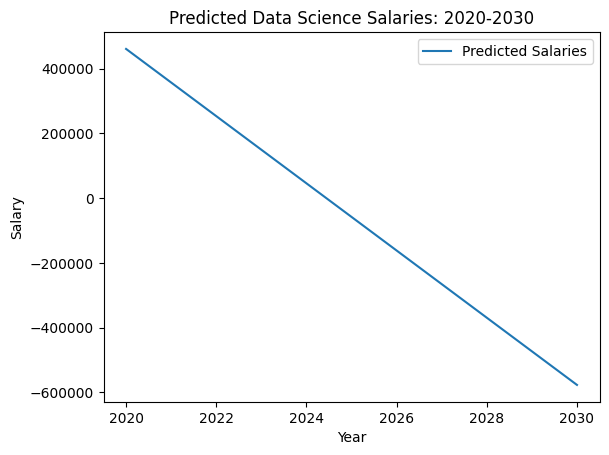

In [38]:
plt.plot(future_years, predicted_salaries, label='Predicted Salaries')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Predicted Data Science Salaries: 2020-2030')
plt.legend()
plt.show()